# <font color='blue'>Prevevisão da eficiência energética de edifícios</font>

Este Jupyter Notebook apresenta todos os passos executados na análise em questão

Esse código foi confeccionado para participar da Competição DSA de Machine Learning - Edição Fevereiro/2019

# O processo da Aprendizagem de Máquina

O processo de Aprendizagem de Máquina precisa receber os dados organizados e consistentes e para isso são necessárias algumas etapas:
<p>1 – Definição do problema a ser resolvido
<p>2 – Exploração dos dados
<p>3 – Criação e aplicação do Modelo
<p>4 – Apresentação dos Resultados

### 1 – Definição do problema a ser resolvido

O Objetivo desse trabalho é fazer a previsão do "Energy Star" de edifícios

Nota: O ENERGY STAR é um programa voluntário da Agência de Proteção Ambiental dos EUA (EPA) que ajuda empresas e indivíduos a proteger o meio ambiente por meio de um desempenho energético superior.

### 2 – Exploração dos dados

A preparação e exporação dos dados é a atividade que consome maior parte do tempo do processo de aprendizagem de máquina, e pode ser dividido em 5 etapas:


#### 2.1 - Identificação das variáveis

O dataset foi obtido no site do kaggle (local onde a competição está sendo realizada) e possui os seguintes campos:

- OrderId
- Property Id
- Property Name
- Parent Property Id
- Parent Property Name
- BBL - 10 digits
- NYC Borough, Block and Lot (BBL) self-reported
- NYC Building Identification Number (BIN)
- Address 1 (self-reported)
- Address 2
- Postal Code
- Street Number
- Street Name
- Borough
- DOF Gross Floor Area
- Primary Property Type - Self Selected
- List of All Property Use Types at Property
- Largest Property Use Type
- Largest Property Use Type - Gross Floor Area (ft²)
- 2nd Largest Property Use Type
- 2nd Largest Property Use - Gross Floor Area (ft²)
- 3rd Largest Property Use Type
- 3rd Largest Property Use Type - Gross Floor Area (ft²)
- Year Built
- Number of Buildings - Self-reported
- Occupancy
- Metered Areas (Energy)
- Metered Areas (Water)
- Site EUI (kBtu/ft²)
- Weather Normalized Site EUI (kBtu/ft²)
- Weather Normalized Site Electricity Intensity (kWh/ft²)
- Weather Normalized Site Natural Gas Intensity (therms/ft²)
- Weather Normalized Source EUI (kBtu/ft²)
- Fuel Oil #1 Use (kBtu)
- Fuel Oil #2 Use (kBtu)
- Fuel Oil #4 Use (kBtu)
- Fuel Oil #5 & 6 Use (kBtu)
- Diesel #2 Use (kBtu)
- District Steam Use (kBtu)
- Natural Gas Use (kBtu)
- Weather Normalized Site Natural Gas Use (therms)
- Electricity Use - Grid Purchase (kBtu)
- Weather Normalized Site Electricity (kWh)
- Total GHG Emissions (Metric Tons CO2e)
- Direct GHG Emissions (Metric Tons CO2e)
- Indirect GHG Emissions (Metric Tons CO2e)
- Property GFA - Self-Reported (ft²)
- Water Use (All Water Sources) (kgal)
- Water Intensity (All Water Sources) (gal/ft²)
- Source EUI (kBtu/ft²)
- Release Date
- Water Required?
- DOF Benchmarking Submission Status
- Latitude
- Longitude
- Community Board
- Council District
- Census Tract
- NTA

In [97]:
#importando as bibliotecas
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

plt.rcParams['figure.dpi'] = 90

from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


- Carga dos dados

#### Extraindo e Carregando os Dados

In [98]:
# Carregando arquivo csv usando Pandas
arquivo = 'data/dataset_treino.csv'
dados = pd.read_csv(arquivo)
print(dados.shape)

(6622, 60)


#### Análise Exploratória de Dados

##### Estatística Descritiva

In [99]:
# Tipo de dados de cada atributo
dados.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

A variável que desejamos fazer a previsão é a variável de nome "ENERGY STAR Score" (que está no meio do nosso dataframe). Para faciliar o trabalho, vamos passar essa variável para o final do data frame (última coluna), e vamos renomeá-la para "ALVO"

In [100]:
dados['ALVO']=dados['ENERGY STAR Score']
dados.drop('ENERGY STAR Score', inplace=True, axis=1)

In [101]:
dados.isnull().any()

Order                                                         False
Property Id                                                   False
Property Name                                                 False
Parent Property Id                                            False
Parent Property Name                                          False
BBL - 10 digits                                               False
NYC Borough, Block and Lot (BBL) self-reported                False
NYC Building Identification Number (BIN)                      False
Address 1 (self-reported)                                     False
Address 2                                                     False
Postal Code                                                   False
Street Number                                                  True
Street Name                                                    True
Borough                                                        True
DOF Gross Floor Area                            

idenfificando valores nulos ou fltantes

In [102]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 60 columns):
Order                                                         6622 non-null int64
Property Id                                                   6622 non-null int64
Property Name                                                 6622 non-null object
Parent Property Id                                            6622 non-null object
Parent Property Name                                          6622 non-null object
BBL - 10 digits                                               6622 non-null object
NYC Borough, Block and Lot (BBL) self-reported                6622 non-null object
NYC Building Identification Number (BIN)                      6622 non-null object
Address 1 (self-reported)                                     6622 non-null object
Address 2                                                     6622 non-null object
Postal Code                                                   662

Analisando algumas estatísticas básicas sobre colunas numéricas

#### Analisando os dados numéricos

In [103]:
coluna_numericas=['Order',
'Property Id',
'DOF Gross Floor Area',
'Largest Property Use Type - Gross Floor Area (ft²)',
'Year Built',
'Number of Buildings - Self-reported',
'Occupancy',
'Site EUI (kBtu/ft²)',
'Property GFA - Self-Reported (ft²)',
'Source EUI (kBtu/ft²)',
'Latitude',
'Longitude',
'Community Board',
'Council District',
'Census Tract']
dados_numéricos=dados[coluna_numericas]

In [104]:
dados_numéricos.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,6622.00,6622.00,6590.00,6622.00,6622.00,6622.00,6622.00,6622.00,6622.00,6622.00,5370.00,5370.00,5370.00,5370.00,5370.00
mean,7420.26,3649955.52,161163.51,154778.34,1948.32,1.29,99.02,80.12,159843.26,133.98,40.75,-73.96,7.34,16.42,5043.09
std,4220.06,1044967.57,256974.93,234088.40,29.89,3.89,5.67,32.01,243936.42,59.48,0.08,0.04,3.95,15.86,13028.99
min,21.00,7365.00,50028.00,3800.00,1649.00,0.00,0.00,0.00,120.00,0.00,40.52,-74.22,1.00,1.00,1.00
25%,3695.25,2769788.00,65192.00,66000.00,1927.00,1.00,100.00,62.70,67000.00,100.00,40.70,-73.98,5.00,4.00,105.00
50%,7374.50,3324127.00,91616.00,91000.00,1940.00,1.00,100.00,78.50,92998.00,123.65,40.76,-73.96,7.00,10.00,218.00
75%,11165.00,4409690.50,155156.00,151481.50,1964.00,1.00,100.00,95.90,155481.25,157.20,40.82,-73.93,10.00,33.00,549.00
max,14993.00,5990844.00,8512479.00,6940450.00,2019.00,140.00,100.00,204.80,6940450.00,576.80,40.91,-73.75,18.00,51.00,105804.00


In [105]:
dados_numéricos.head()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
0,21,2780056,nan,321464.00,1939,2,100,76.20,321464,103.30,nan,nan,nan,nan,nan
1,22,4988574,179130.00,204720.00,1939,1,100,75.70,204720,106.60,40.86,-73.93,12.00,10.00,281.00
2,24,2806486,nan,189766.00,1911,2,100,68.00,189766,115.60,nan,nan,nan,nan,nan
3,25,4988686,151666.00,130629.00,1911,1,100,23.70,130629,74.30,40.77,-73.96,8.00,4.00,130.00
4,26,4988688,64827.00,54913.00,1911,1,100,17.90,54913,53.90,40.77,-73.96,8.00,4.00,130.00


In [106]:
dados.groupby('Order').size().sort_values(ascending=False)

Order
14993    1
4889     1
4873     1
4875     1
4876     1
4877     1
4880     1
4881     1
4884     1
4885     1
4886     1
4888     1
4890     1
4869     1
4891     1
4892     1
4893     1
4894     1
4897     1
4898     1
4899     1
4900     1
4901     1
4902     1
4871     1
4868     1
4915     1
4845     1
4816     1
4818     1
        ..
10013    1
10015    1
10017    1
10020    1
9947     1
9934     1
9925     1
9917     1
9871     1
9873     1
9874     1
9876     1
9877     1
9880     1
9881     1
9882     1
9884     1
9885     1
9886     1
9888     1
9890     1
9896     1
9897     1
9899     1
9901     1
9903     1
9907     1
9910     1
9914     1
21       1
Length: 6622, dtype: int64

Verificou-se que os campos "Order" e "Property Id" pssuem valores únicos para cada uma das ocorrências, e por essa razão não serão uteis para a atividade em questão. Logo, esses campos serão excluídos do data set.

In [107]:
dados_1=dados.copy()

In [108]:
colunas=['Order'
,'Property Id']
dados_1.drop(colunas, inplace=True, axis=1)

#### Análise dos dados textuais

O tipo dos dados é muito importante. Pode ser necessário converter strings ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários.

Analisando alguns campos, persebe-se que, apesar de serem representados como string, tais valore são numéricos

In [109]:
dados.describe(include='object')

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Metered Areas (Energy),Metered Areas (Water),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
count,6622,6622,6622,6622,6622,6622,6622,6622,6622,6587,6589,6590,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6622,6579,6605,5370
unique,6620,59,59,6588,6588,6514,6594,90,237,2971,1612,5,24,371,19,48,1088,41,383,3,6,1461,301,21,2048,6,1118,685,152,6,501,5884,5595,6543,6272,5099,4168,3942,4299,3690,2313,2,1,137
top,Jetro Cash && Carry,Not Applicable: Standalone Property,Not Applicable: Standalone Property,4067920600,4-06792-0600,Not Available,410 West 118th Street,Not Available,10022,1,BROADWAY,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Not Available,Not Available,Not Available,Not Available,Whole Building,Whole Building,Not Available,Not Available,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,428.3,0,0,Not Available,Not Available,05/01/2017 02:58:14 PM,Yes,In Compliance,Midtown-Midtown South
freq,2,6486,6486,6,6,90,7,6515,158,35,194,2802,5209,4207,5212,5010,5010,6108,6108,6605,4067,726,326,1043,726,6617,5141,5869,6336,6616,6119,694,973,52,326,7,420,48,2120,2120,663,4277,6605,441



Foram analisados todos os campos textuais utilizando-se para isso o código da célula abaixo.

- Nessa análise verificou-se, para cada coluna, a quantidade de registros distintos 
    - Colunas com muitos registros faltantes ou com a maioria das ocorrências com valores iguais - foram selecionados para serem retirados do data set
    
- Colunas com valores realmene textuais
    - com muitos valores distintos ou faltantes - foram selecionadas para serem retiradas do data set
    - com poucos valores distintos ou faltantes - foram selecionadas para serem mantidas no data set
    
- Colunas que apesar de estarem armazenadas como texto, mas que representavam valores numéricos
    - com muitos valores faltantes - foram selecionadas para serem retiradas do data set
    - com poucos valores faltantes - foram selecionadas para serem mantidas do data set (sendo convertida para o tipo numérico)

In [110]:
############
dados.groupby('Borough').size().sort_values(ascending=False)

Borough
Manhattan        2802
Brooklyn         1371
Queens           1179
Bronx            1167
Staten Island      71
dtype: int64

##### Resultado da análise

A partir da análise realizada, cgegouse as seguintyes conclusões:


Campos que devem ser eliminados

- Property Name
- Parent Property Id
- Parent Property Name
- BBL - 10 digits
- NYC Borough, Block and Lot (BBL) self-reported
- NYC Building Identification Number (BIN)
- Address 1 (self-reported)
- Address 2
- Street Number
- Street Name
- Postal Code
- List of All Property Use Types at Property
- 2nd Largest Property Use Type
- 2nd Largest Property Use - Gross Floor Area (ft²)
- 3rd Largest Property Use Type
- 3rd Largest Property Use Type - Gross Floor Area (ft²)
- Metered Areas (Energy)
- Metered Areas  (Water)
- Fuel Oil #1 Use (kBtu)
- Fuel Oil #2 Use (kBtu)
- Fuel Oil #4 Use (kBtu)
- Fuel Oil #5 & 6 Use (kBtu)
- Diesel #2 Use (kBtu)
- District Steam Use (kBtu)
- Release Date
- DOF Benchmarking Submission Status
- NTA


Campos que devem ser convertidos (para o tipo numérico)

- Weather Normalized Site EUI (kBtu/ft²)
- Weather Normalized Site Electricity Intensity (kWh/ft²)
- Weather Normalized Site Natural Gas Intensity (therms/ft²)
- Weather Normalized Source EUI (kBtu/ft²)
- Natural Gas Use (kBtu)
- Weather Normalized Site Natural Gas Use (therms)
- Electricity Use - Grid Purchase (kBtu)
- Weather Normalized Site Electricity (kWh)
- Total GHG Emissions (Metric Tons CO2e)
- Direct GHG Emissions (Metric Tons CO2e)
- Indirect GHG Emissions (Metric Tons CO2e)
- Water Use (All Water Sources) (kgal)           --------- Fiquei na dúvida, pq havia 2120 registros sem informação
- Water Intensity (All Water Sources) (gal/ft²)  --------- Fiquei na dúvida, pq havia 2120 registros sem informação


Campos que devem ser mantidos como estão (pelo menos por enquanto)

- Borough
- Primary Property Type - Self Selected
- Largest Property Use Type
- Water Required?

In [111]:
dados.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,ALVO
0,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,Not Available,10040,NaN,NaN,NaN,nan,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.00,Not Available,Not Available,Not Available,Not Available,1939,2,100,Whole Building,Whole Building,76.20,79.9,3.5,0,106.2,Not Available,Not Available,1.96354077E7,Not Available,Not Available,Not Available,880200,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.30,05/01/2017 10:09:31 PM,Yes,In Compliance,nan,nan,nan,nan,nan,NaN,72
1,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,Not Available,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.00,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.00,Not Available,Not Available,Not Available,Not Available,1939,1,100,Whole Building,Not Available,75.70,79,4,0,109.1,Not Available,Not Available,1.20478901E7,Not Available,Not Available,Not Available,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,Not Available,Not Available,106.60,05/01/2017 10:09:31 PM,NaN,In Compliance,40.86,-73.93,12.00,10.00,281.00,Washington Heights North,67
2,24,2806486,Park 76th Street Inc.,2806486,Park 76th Street Inc.,1013900037;1013910034,1013900037;1013910034,1041702; 1041800,830-840 Park Avenue,Not Available,10021,NaN,NaN,NaN,nan,Multifamily Housing,Multifamily Housing,Multifamily Housing,189766.00,Not Available,Not Available,Not Available,Not Available,1911,2,100,Whole Building,Whole Building,68.00,Not Available,6.1,0.5,Not Available,Not Available,112138.8,Not Available,Not Available,Not Available,Not Available,8786386.9,98264.5,4013954.9,1156269.9,847.5,475,372.5,189766,Not Available,Not Available,115.60,05/01/2017 10:09:31 PM,Yes,In Compliance,nan,nan,nan,nan,nan,NaN,100
3,25,4988686,- 830 Park Avenue bldg,2806486,Park 76th Street Inc.,1013900037,1013900037,1041702,830 Park Avenue,Not Available,10021,830,PARK AVENUE,Manhattan,151666.00,Multifamily Housing,Multifamily Housing,Multifamily Housing,130629.00,Not Available,Not Available,Not Available,Not Available,1911,1,100,Another configuration,Not Available,23.70,23.4,6.8,Not Available,73.3,Not Available,Not Available,Not Available,Not Avail

#### Retirando as colunas selecionadas do dataframe

In [112]:
dados_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 58 columns):
Property Name                                                 6622 non-null object
Parent Property Id                                            6622 non-null object
Parent Property Name                                          6622 non-null object
BBL - 10 digits                                               6622 non-null object
NYC Borough, Block and Lot (BBL) self-reported                6622 non-null object
NYC Building Identification Number (BIN)                      6622 non-null object
Address 1 (self-reported)                                     6622 non-null object
Address 2                                                     6622 non-null object
Postal Code                                                   6622 non-null object
Street Number                                                 6587 non-null object
Street Name                                                   6

In [113]:
# apaga colunas 
colunas=['Property Name'
,'Parent Property Id'
,'Parent Property Name'
,'BBL - 10 digits'
,'NYC Borough, Block and Lot (BBL) self-reported'
,'NYC Building Identification Number (BIN)'
,'Address 1 (self-reported)'
,'Address 2'
,'Street Number'
,'Street Name'
,'Postal Code'
,'List of All Property Use Types at Property'
,'2nd Largest Property Use Type'
,'2nd Largest Property Use - Gross Floor Area (ft²)'
,'3rd Largest Property Use Type'
,'3rd Largest Property Use Type - Gross Floor Area (ft²)'
,'Metered Areas (Energy)'
,'Metered Areas  (Water)'
,'Fuel Oil #1 Use (kBtu)'
,'Fuel Oil #2 Use (kBtu)'
,'Fuel Oil #4 Use (kBtu)'
,'Fuel Oil #5 & 6 Use (kBtu)'
,'Diesel #2 Use (kBtu)'
,'District Steam Use (kBtu)'
,'Release Date'
,'DOF Benchmarking Submission Status'
,'NTA']
dados_1.drop(colunas, inplace=True, axis=1)

#### Converter as colunas selecionadas

In [114]:
def converter_numero(valor):
    try:
        return float(valor)
    except:
        return np.nan


dados_1['Weather Normalized Site EUI (kBtu/ft²)'] = dados_1['Weather Normalized Site EUI (kBtu/ft²)'].apply(converter_numero)

dados_1['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = dados_1['Weather Normalized Site Electricity Intensity (kWh/ft²)'].apply(converter_numero)
dados_1['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = dados_1['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].apply(converter_numero)
dados_1['Weather Normalized Source EUI (kBtu/ft²)'] = dados_1['Weather Normalized Source EUI (kBtu/ft²)'].apply(converter_numero)
dados_1['Natural Gas Use (kBtu)'] = dados_1['Natural Gas Use (kBtu)'].apply(converter_numero)
dados_1['Weather Normalized Site Natural Gas Use (therms)'] = dados_1['Weather Normalized Site Natural Gas Use (therms)'].apply(converter_numero)
dados_1['Electricity Use - Grid Purchase (kBtu)'] = dados_1['Electricity Use - Grid Purchase (kBtu)'].apply(converter_numero)
dados_1['Weather Normalized Site Electricity (kWh)'] = dados_1['Weather Normalized Site Electricity (kWh)'].apply(converter_numero)
dados_1['Total GHG Emissions (Metric Tons CO2e)'] = dados_1['Total GHG Emissions (Metric Tons CO2e)'].apply(converter_numero)
dados_1['Direct GHG Emissions (Metric Tons CO2e)'] = dados_1['Direct GHG Emissions (Metric Tons CO2e)'].apply(converter_numero)
dados_1['Indirect GHG Emissions (Metric Tons CO2e)'] = dados_1['Indirect GHG Emissions (Metric Tons CO2e)'].apply(converter_numero)
dados_1['Water Use (All Water Sources) (kgal)'] = dados_1['Water Use (All Water Sources) (kgal)'].apply(converter_numero)
dados_1['Water Intensity (All Water Sources) (gal/ft²)'] = dados_1['Water Intensity (All Water Sources) (gal/ft²)'].apply(converter_numero)

In [115]:
dados_1.shape

(6622, 31)

In [116]:
# Visualizando as primeiras linhas
dados_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 31 columns):
Borough                                                       6590 non-null object
DOF Gross Floor Area                                          6590 non-null float64
Primary Property Type - Self Selected                         6622 non-null object
Largest Property Use Type                                     6622 non-null object
Largest Property Use Type - Gross Floor Area (ft²)            6622 non-null float64
Year Built                                                    6622 non-null int64
Number of Buildings - Self-reported                           6622 non-null int64
Occupancy                                                     6622 non-null int64
Site EUI (kBtu/ft²)                                           6622 non-null float64
Weather Normalized Site EUI (kBtu/ft²)                        5896 non-null float64
Weather Normalized Site Electricity Intensity (kWh/ft²)       

Verificando-se os dados, percebe-se que alguns atributos não serão úteis para o processo de aprendizagem de máquina (atributos que são iguais para praticamente todas as ocorrências, como por exemplo "DOF Benchmarking Submission Status" , ou atributos que sempre serão diferentes em cada um dos registros, como por exemplo "Property Id") e por isso esses dados foram retirados do dataset.

In [117]:
dados_1.head()

,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract,ALVO
0,NaN,nan,Multifamily Housing,Multifamily Housing,321464.00,1939,2,100,76.20,79.90,3.50,0.00,106.20,880200.00,8906.30,3968641.70,1121931.80,1893.40,1525.10,368.30,321464,5915.60,18.40,103.30,Yes,nan,nan,nan,nan,nan,72
1,Manhattan,179130.00,Multifamily Housing,Multifamily Housing,204720.00,1939,1,100,75.70,79.00,4.00,0.00,109.10,553439.40,5604.40,2886852.20,820016.20,1204.40,936.50,267.90,204720,nan,nan,106.60,NaN,40.86,-73.93,12.00,10.00,281.00,67
2,NaN,nan,Multifamily Housing,Multifamily Housing,189766.00,1911,2,100,68.00,nan,6.10,0.50,nan,8786386.90,98264.50,4013954.90,1156269.90,847.50,475.00,372.50,189766,nan,nan,115.60,Yes,nan,nan,nan,nan,nan,100
3,Manhattan,151666.00,Multifamily Housing,Multifamily Housing,130629.00,1911,1,100,23.70,23.40,6.80,nan,73.30,nan,nan,3090622.70,894049.00,286.80,0.00,286.80,130629,nan,nan,74.30,NaN,40.77,-73.96,8.00,4.00,130.00,100
4,Manhattan,64827.00,Multifamily Housing,Multifamily Housing,54913.00,1911,1,100,17.90,17.40,4.80,0.00,52.30,59412.90,601.00,923332.20,262377.20,88.80,3.20,85.70,54913,231.90,4.22,53.90,Yes,40.77,-73.96,8.00,4.00,130.00,100


In [118]:
dados_1.shape

(6622, 31)

### Analisando os Atributos

In [119]:
"""
Função para fazer a conversão do dado de valores textuais para valores inteiros 
recebe como parâmetro o dataframe, um dicionario para fazer a conversão e o campo (a ser tratado)
"""
def alteraValores(df,dicionario,campo):
    for i in dicionario:
        df[campo]=np.where(df[campo]==i, dicionario[i], df[campo])
    df[campo]=pd.to_numeric(df[campo], errors='ignore')
    return df
    

- Borough

In [120]:
dados_1.groupby('Borough').size()

Borough
Bronx            1167
Brooklyn         1371
Manhattan        2802
Queens           1179
Staten Island      71
dtype: int64

In [121]:
#Quantidade de registros nulos para o campo em questão
len(dados_1[dados_1['Borough'].isnull()])

32

In [122]:
#preenchendo os valores nulos com o valor "Sem Infor"
dados_1['Borough']=np.where(dados_1['Borough'].isnull(), 'Sem Infor', dados_1['Borough'])

In [123]:
dados_1.groupby('Borough').size()

Borough
Bronx            1167
Brooklyn         1371
Manhattan        2802
Queens           1179
Sem Infor          32
Staten Island      71
dtype: int64

In [124]:
#prepara um dicionário para utilizar na função alteraValores
dict_translate_Borough={'Sem Infor':0,'Bronx':1,'Brooklyn':2,'Manhattan':3,'Queens':4,'Staten Island':5}

In [125]:
#chama a função para alterar alterar os valores do campo 'Borough'
dados_1=alteraValores(dados_1,dict_translate_Borough,'Borough')

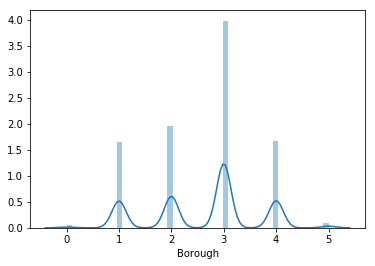

In [126]:
sns.distplot(dados_1['Borough'])

- DOF Gross Floor Area 

In [127]:
dados_1.groupby('DOF Gross Floor Area').size()

DOF Gross Floor Area
50028.00      1
50029.00      1
50049.00      1
50052.00      1
50059.00      1
50066.00      1
50070.00      1
50071.00      1
50075.00      1
50082.00      1
50089.00      1
50094.00      1
50100.00      1
50117.00      1
50150.00      1
50160.00      1
50180.00      1
50200.00      2
50207.00      1
50220.00      1
50250.00      2
50251.00      3
50254.00      1
50256.00      1
50258.00      1
50290.00      1
50326.00      1
50338.00      1
50381.00      1
50388.00      2
             ..
1596521.00    1
1617206.00    1
1630256.00    1
1642675.00    1
1651267.00    1
1666763.00    1
1721672.00    1
1736513.00    1
1760893.00    1
1800000.00    1
1824820.00    1
1835280.00    1
1899211.00    1
1931978.00    1
1968872.00    1
2035745.00    1
2046455.00    1
2084079.00    1
2139035.00    1
2200404.00    1
2233692.00    1
2267925.00    1
2438059.00    1
2689635.00    1
2768775.00    1
2812739.00    1
3678000.00    1
5541031.00    1
6940450.00    1
8512479.00    1
Len

In [128]:
#Quantidade de registros nulos para o campo em questão
len(dados_1[dados_1['DOF Gross Floor Area'].isnull()])

32

In [129]:
# Atualiza os valores nulos com a média
media_DOF_Gross_Floor_Area=round(dados_1['DOF Gross Floor Area'].mean(),2)
media_DOF_Gross_Floor_Area

161163.51

In [130]:
#atualiza os valores nulos com a média
dados_1['DOF Gross Floor Area'].fillna(media_DOF_Gross_Floor_Area, inplace = True) 

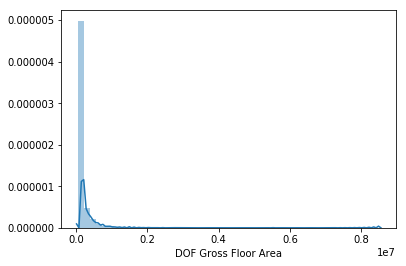

In [131]:
sns.distplot(dados_1['DOF Gross Floor Area'])

- Primary Property Type - Self Selected

In [132]:
dados_1['Primary Property Type - Self Selected'].describe()

count                    6622
unique                     24
top       Multifamily Housing
freq                     5209
Name: Primary Property Type - Self Selected, dtype: object

O campo 'Primary Property Type - Self Selected' não possui valores nulos

In [133]:
dados_1.groupby('Primary Property Type - Self Selected').size()

Primary Property Type - Self Selected
Bank Branch                                 1
College/University                         12
Courthouse                                  1
Distribution Center                        39
Financial Office                           10
Hospital (General Medical & Surgical)      10
Hotel                                     140
K-12 School                                59
Manufacturing/Industrial Plant              1
Medical Office                             16
Mixed Use Property                          9
Multifamily Housing                      5209
Non-Refrigerated Warehouse                 97
Office                                    803
Other                                      24
Refrigerated Warehouse                      8
Residence Hall/Dormitory                   66
Residential Care Facility                   1
Retail Store                               38
Self-Storage Facility                       2
Senior Care Community                     

In [134]:
dict_tanslate_Primary_Property_Type_Self_Selected={'Bank Branch':0
,'College/University':1
,'Courthouse':2
,'Distribution Center':3
,'Financial Office':4
,'Hospital (General Medical & Surgical)':5
,'Hotel':6
,'K-12 School':7
,'Manufacturing/Industrial Plant':8
,'Medical Office':9
,'Mixed Use Property':10
,'Multifamily Housing':11
,'Non-Refrigerated Warehouse':12
,'Office':13
,'Other':14
,'Refrigerated Warehouse':15
,'Residence Hall/Dormitory':16
,'Residential Care Facility':17
,'Retail Store':18
,'Self-Storage Facility':19
,'Senior Care Community':20
,'Supermarket/Grocery Store':21
,'Wholesale Club/Supercenter':22
,'Worship Facility':23
,'Fitness Center/Health Club/Gym':24}

In [135]:
dados_1=alteraValores(dados_1,dict_tanslate_Primary_Property_Type_Self_Selected,'Primary Property Type - Self Selected')

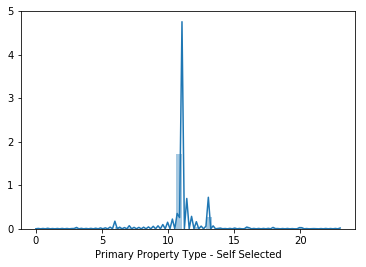

In [136]:
#histograma
sns.distplot(dados_1['Primary Property Type - Self Selected'])

- Largest Property Use Type

In [137]:
dados_1['Largest Property Use Type'].describe()

count                    6622
unique                     19
top       Multifamily Housing
freq                     5212
Name: Largest Property Use Type, dtype: object

In [138]:
dados_1.groupby('Largest Property Use Type').size()

Largest Property Use Type
Bank Branch                                 1
Courthouse                                  2
Distribution Center                        37
Financial Office                           10
Hospital (General Medical & Surgical)      10
Hotel                                     141
K-12 School                                73
Medical Office                             17
Multifamily Housing                      5212
Non-Refrigerated Warehouse                104
Office                                    825
Parking                                     3
Refrigerated Warehouse                      7
Residence Hall/Dormitory                   66
Retail Store                               37
Senior Care Community                      57
Supermarket/Grocery Store                   9
Wholesale Club/Supercenter                  3
Worship Facility                            8
dtype: int64

In [139]:
dict_Largest_Property_Use_Type={'Bank Branch':0
,'Courthouse':1
,'Distribution Center':2
,'Financial Office':3
,'Hospital (General Medical & Surgical)':4
,'Hotel':5
,'K-12 School':6
,'Medical Office':7
,'Multifamily Housing':8
,'Non-Refrigerated Warehouse':9
,'Office':10
,'Parking':11
,'Refrigerated Warehouse':12
,'Residence Hall/Dormitory':13
,'Retail Store':14
,'Senior Care Community':15
,'Supermarket/Grocery Store':16
,'Wholesale Club/Supercenter':17
,'Worship Facility':18}

In [140]:
dados_1=alteraValores(dados_1,dict_Largest_Property_Use_Type,'Largest Property Use Type')

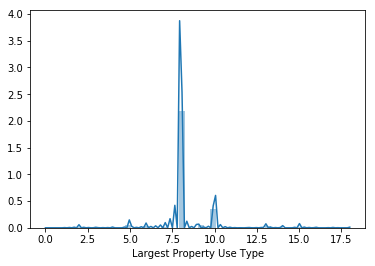

In [141]:
sns.distplot(dados_1['Largest Property Use Type'])

- Weather Normalized Site EUI (kBtu/ft²)

In [142]:
#Quantidade de registros nulos para o campo em questão
len(dados_1[dados_1['Weather Normalized Site EUI (kBtu/ft²)'].isnull()])

726

In [143]:
dados_1.groupby('Weather Normalized Site EUI (kBtu/ft²)').size()

Weather Normalized Site EUI (kBtu/ft²)
0.00      4
0.10      1
0.20      1
0.50      1
0.60      1
1.10      1
1.50      1
1.80      1
1.90      2
2.00      1
2.10      2
2.40      1
2.50      1
3.20      1
3.30      1
3.80      1
4.10      1
4.30      1
4.50      1
4.60      1
4.90      5
5.00      1
5.10      1
5.20      1
5.30      1
5.40      4
5.50      3
5.80      2
5.90      1
6.10      2
         ..
196.30    1
196.40    1
196.70    1
197.70    1
199.10    1
199.30    1
199.70    1
200.00    1
200.40    1
200.60    1
201.60    1
202.10    1
202.30    1
202.50    1
202.70    1
203.90    1
204.10    2
204.30    1
204.50    1
204.80    1
205.00    1
205.10    1
206.20    1
207.20    1
208.50    1
209.00    1
209.80    1
210.70    1
211.70    1
219.50    1
Length: 1460, dtype: int64

In [144]:
# Atualiza os valores nulos com a média
media_Weather_Normalized_Site_EUI=round(dados_1['Weather Normalized Site EUI (kBtu/ft²)'].mean(),2)
media_Weather_Normalized_Site_EUI

dados_1['Weather Normalized Site EUI (kBtu/ft²)'].fillna(media_Weather_Normalized_Site_EUI, inplace = True) 

- Weather Normalized Site Electricity Intensity (kWh/ft²)

In [145]:
#Quantidade de registros nulos para o campo em questão
len(dados_1[dados_1['Weather Normalized Site Electricity Intensity (kWh/ft²)'].isnull()])

326

In [146]:
# Atualiza os valores nulos com a média
media_Weather_Normalized_Site_Electricity_Intensity=round(dados_1['Weather Normalized Site Electricity Intensity (kWh/ft²)'].mean(),2)

dados_1['Weather Normalized Site Electricity Intensity (kWh/ft²)'].fillna(media_Weather_Normalized_Site_Electricity_Intensity, inplace = True) 

- Weather Normalized Site Natural Gas Intensity (therms/ft²)

In [147]:
#Quantidade de registros nulos para o campo em questão
len(dados_1[dados_1['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].isnull()])

973

In [148]:
# Atualiza os valores nulos com a média
media_Weather_Normalized_Site_Natural_Gas_Intensity=round(dados_1['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].mean(),2)

dados_1['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].fillna(media_Weather_Normalized_Site_Natural_Gas_Intensity, inplace = True) 

- Weather Normalized Source EUI (kBtu/ft²)

In [149]:
#Quantidade de registros nulos para o campo em questão
len(dados_1[dados_1['Weather Normalized Source EUI (kBtu/ft²)'].isnull()])

726

In [150]:
# Atualiza os valores nulos com a média
media_Weather_Normalized_Source_EUI=round(dados_1['Weather Normalized Source EUI (kBtu/ft²)'].mean(),2)

dados_1['Weather Normalized Source EUI (kBtu/ft²)'].fillna(media_Weather_Normalized_Source_EUI, inplace = True) 

- Natural Gas Use (kBtu)

In [151]:
# Atualiza os valores nulos com a média
media_Natural_Gas_Use=round(dados_1['Natural Gas Use (kBtu)'].mean(),2)

dados_1['Natural Gas Use (kBtu)'].fillna(media_Natural_Gas_Use, inplace = True)

- Weather Normalized Site Natural Gas Use (therms) 

In [152]:
# Atualiza os valores nulos com a média
media_Weather_Normalized_Site_Natural_Gas_Use=round(dados_1['Weather Normalized Site Natural Gas Use (therms)'].mean(),2)

dados_1['Weather Normalized Site Natural Gas Use (therms)'].fillna(media_Weather_Normalized_Site_Natural_Gas_Use, inplace = True)

- Electricity Use - Grid Purchase (kBtu)

In [153]:
# Atualiza os valores nulos com a média
media_Electricity_Use_Grid_Purchase=round(dados_1['Electricity Use - Grid Purchase (kBtu)'].mean(),2)

dados_1['Electricity Use - Grid Purchase (kBtu)'].fillna(media_Electricity_Use_Grid_Purchase, inplace = True)

- Weather Normalized Site Electricity (kWh)

In [154]:
# Atualiza os valores nulos com a média
media_Weather_Normalized_Site_Electricity=round(dados_1['Weather Normalized Site Electricity (kWh)'].mean(),2)

dados_1['Weather Normalized Site Electricity (kWh)'].fillna(media_Weather_Normalized_Site_Electricity, inplace = True)

- Total GHG Emissions (Metric Tons CO2e)

In [155]:
# Atualiza os valores nulos com a média
media_Total_GHG_Emissions=round(dados_1['Total GHG Emissions (Metric Tons CO2e)'].mean(),2)

dados_1['Total GHG Emissions (Metric Tons CO2e)'].fillna(media_Total_GHG_Emissions, inplace = True)

- Direct GHG Emissions (Metric Tons CO2e)

In [156]:
# Atualiza os valores nulos com a média
media_Direct_GHG_Emissions=round(dados_1['Direct GHG Emissions (Metric Tons CO2e)'].mean(),2)

dados_1['Direct GHG Emissions (Metric Tons CO2e)'].fillna(media_Direct_GHG_Emissions, inplace = True)

- Indirect GHG Emissions (Metric Tons CO2e)

In [157]:
# Atualiza os valores nulos com a média
media_Indirect_GHG_Emissions=round(dados_1['Indirect GHG Emissions (Metric Tons CO2e)'].mean(),2)

dados_1['Indirect GHG Emissions (Metric Tons CO2e)'].fillna(media_Indirect_GHG_Emissions, inplace = True)

- Water Use (All Water Sources) (kgal)

In [158]:
# Atualiza os valores nulos com a média
media_Water_Use=round(dados_1['Water Use (All Water Sources) (kgal)'].mean(),2)

dados_1['Water Use (All Water Sources) (kgal)'].fillna(media_Water_Use, inplace = True)

- Water Intensity (All Water Sources) (gal/ft²)

In [159]:
# Atualiza os valores nulos com a média
media_Water_Intensity=round(dados_1['Water Intensity (All Water Sources) (gal/ft²)'].mean(),2)

dados_1['Water Intensity (All Water Sources) (gal/ft²)'].fillna(media_Water_Intensity, inplace = True)

- Source EUI (kBtu/ft²)

In [160]:
# Atualiza os valores nulos com a média
media_Source_EUI=round(dados_1['Source EUI (kBtu/ft²)'].mean(),2)

dados_1['Source EUI (kBtu/ft²)'].fillna(media_Source_EUI, inplace = True)

- Water Required?

In [161]:
dados_1['Water Required?'].describe()

count     6579
unique       2
top        Yes
freq      4277
Name: Water Required?, dtype: object

In [162]:
dados_1.groupby('Water Required?').size()

Water Required?
No     2302
Yes    4277
dtype: int64

In [163]:
#preenchendo os valores nulos com o valor "Sem Infor"
dados_1['Water Required?']=np.where(dados_1['Water Required?'].isnull(), 'Sem Infor', dados_1['Water Required?'])

In [164]:
dados_1.groupby('Water Required?').size()

Water Required?
No           2302
Sem Infor      43
Yes          4277
dtype: int64

In [165]:
dict_Water_Required={'Sem Infor':0,'No':1,'Yes':2}

In [166]:
dados_1=alteraValores(dados_1,dict_Water_Required,'Water Required?')

- Latitude

In [167]:
# Atualiza os valores nulos com a média
media_Latitude=round(dados_1['Latitude'].mean(),2)

dados_1['Latitude'].fillna(media_Latitude, inplace = True)

- Longitude 

In [168]:
# Atualiza os valores nulos com a média
media_Longitude =round(dados_1['Longitude'].mean(),2)

dados_1['Longitude'].fillna(media_Longitude, inplace = True)

- Community Board

In [169]:
# Atualiza os valores nulos com a média
media_Community_Board =round(dados_1['Community Board'].mean(),2)

dados_1['Community Board'].fillna(media_Community_Board, inplace = True)

- Council District

In [170]:
# Atualiza os valores nulos com a média
media_Council_District =round(dados_1['Council District'].mean(),2)

dados_1['Council District'].fillna(media_Council_District, inplace = True)

- Census Tract

In [171]:
# Atualiza os valores nulos com a média
media_Census_Tract =round(dados_1['Census Tract'].mean(),2)

dados_1['Census Tract'].fillna(media_Census_Tract, inplace = True)

#### Verificando se ainda existe algum valor nulo no dataframe

In [172]:
dados_1.isnull().any()

Borough                                                       False
DOF Gross Floor Area                                          False
Primary Property Type - Self Selected                         False
Largest Property Use Type                                     False
Largest Property Use Type - Gross Floor Area (ft²)            False
Year Built                                                    False
Number of Buildings - Self-reported                           False
Occupancy                                                     False
Site EUI (kBtu/ft²)                                           False
Weather Normalized Site EUI (kBtu/ft²)                        False
Weather Normalized Site Electricity Intensity (kWh/ft²)       False
Weather Normalized Site Natural Gas Intensity (therms/ft²)    False
Weather Normalized Source EUI (kBtu/ft²)                      False
Natural Gas Use (kBtu)                                        False
Weather Normalized Site Natural Gas Use (therms)

In [173]:
dados_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 31 columns):
Borough                                                       6622 non-null int64
DOF Gross Floor Area                                          6622 non-null float64
Primary Property Type - Self Selected                         6622 non-null int64
Largest Property Use Type                                     6622 non-null int64
Largest Property Use Type - Gross Floor Area (ft²)            6622 non-null float64
Year Built                                                    6622 non-null int64
Number of Buildings - Self-reported                           6622 non-null int64
Occupancy                                                     6622 non-null int64
Site EUI (kBtu/ft²)                                           6622 non-null float64
Weather Normalized Site EUI (kBtu/ft²)                        6622 non-null float64
Weather Normalized Site Electricity Intensity (kWh/ft²)       662

In [174]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = dados_1.corr()
corr.sort_values(["ALVO"], ascending = False, inplace = True)
print(corr.ALVO)

Find most important features relative to target
ALVO                                                          1.00
Largest Property Use Type                                     0.12
Primary Property Type - Self Selected                         0.11
Council District                                              0.05
Community Board                                               0.05
Borough                                                       0.02
Largest Property Use Type - Gross Floor Area (ft²)            0.01
Property GFA - Self-Reported (ft²)                            0.01
Census Tract                                                  0.01
DOF Gross Floor Area                                          0.00
Water Required?                                              -0.01
Water Intensity (All Water Sources) (gal/ft²)                -0.01
Water Use (All Water Sources) (kgal)                         -0.02
Number of Buildings - Self-reported                          -0.02
Longitude     

### Correlação entre as Variáveis

A correlação é o relacionamento entre 2 variáveis. O métodos mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houverem atributos altamente correlacionados (colineares).

In [175]:
# Correlação de Pearson
dados_1.corr(method = 'pearson')

,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract,ALVO
Borough,1.00,0.09,0.05,0.06,0.08,0.07,0.07,-0.04,-0.01,-0.01,0.14,-0.03,0.08,0.02,0.02,0.10,0.10,0.07,0.00,0.09,0.08,0.01,0.01,0.09,0.00,-0.22,-0.57,-0.12,-0.23,-0.14,0.02
DOF Gross Floor Area,0.09,1.00,0.04,0.07,0.90,0.14,0.05,-0.06,0.04,0.02,0.22,-0.06,0.15,0.49,0.43,0.71,0.68,0.82,0.48,0.69,0.91,0.07,-0.01,0.16,-0.07,-0.02,-0.11,-0.14,-0.14,-0.04,0.00
Primary Property Type - Self Selected,0.05,0.04,1.00,0.94,0.05,-0.03,-0.01,-0.04,-0.01,-0.01,0.15,-0.05,0.09,-0.02,-0.02,0.10,0.10,0.05,-0.03,0.09,0.05,-0.01,-0.04,0.10,0.00,-0.03,-0.06,-0.04,-0.02,-0.01,0.11
Largest Property Use Type,0.06,0.07,0.94,1.00,0.07,-0.04,-0.02,-0.07,-0.00,-0.01,0.23,-0.08,0.14,-0.03,-0.03,0.14,0.14,0.08,-0.04,0.13,0.07,0.00,-0.03,0.15,-0.03,-0.04,-0.11,-0.09,-0.05,-0.03,0.12
Largest Property Use Type - Gross Floor Area (ft²),0.08,0.90,0.05,0.07,1.00,0.13,0.07,-0.06,0.03,0.02,0.20,-0.06,0.13,0.58,0.56,0.74,0.73,0.90,0.57,0.72,0.99,0.06,-0.01,0.15,-0.08,-0.02,-0.12,-0.14,-0.15,-0.04,0.01
Year Built,0.07,0.14,-0.03,-0.04,0.13,1.00,0.02,0.00,-0.00,-0.01,0.12,0.07,0.07,0.08,0.08,0.12,0.12,0.11,0.04,0.11,0.13,0.04,0.00,0.08,-0.03,-0.10,-0.01,-0.04,0.11,0.00,-0.12
Number of Buildings - Self-reported,0.07,0.05,-0.01,-0.02,0.07,0.02,1.00,0.01,0.01,0.01,-0.02,0.06,-0.01,0.11,0.11,-0.00,-0.00,0.05,0.10,-0.01,0.06,0.00,-0.00,-0.01,-0.01,-0.02,-0.00,0.01,0.02,0.01,-0.02
Occupancy,-0.04,-0.06,-0.04,-0.07,-0.06,0.00,0.01,1.00,0.05,0.04,-0.07,0.05,-0.03,0.01,0.01,-0.08,-0.08,-0.05,0.02,-0.08,-0.06,-0.06,-0.05,-0.01,0.03,0.02,0.08,0.08,0.06,0.03,-0.04
Site EUI (kBtu/ft²),-0.01,0.04,-0.01,-0.00,0.03,-0.00,0.01,0.05,1.00,0.94,0.35,0.45,0.77,0.17,0.16,0.13,0.12,0.23,0.21,0.13,0.04,0.02,0.01,0.80,0.01,0.04,0.03,0.02,-0.03,0.02,-0.73
Weather Normalized Site EUI (kBtu/ft²),-0.01,0.02,-0.01,-0.01,0.02,-0.01,0.01,0.04,0.94,1.00,0.33,0.46,0.79,0.15,0.16,0.10,0.10,0.20,0.20,0.11,0.02,0.03,0.02,0.74,0.03,0.04,0.04,0.03,-0.02,0.02,-0.68


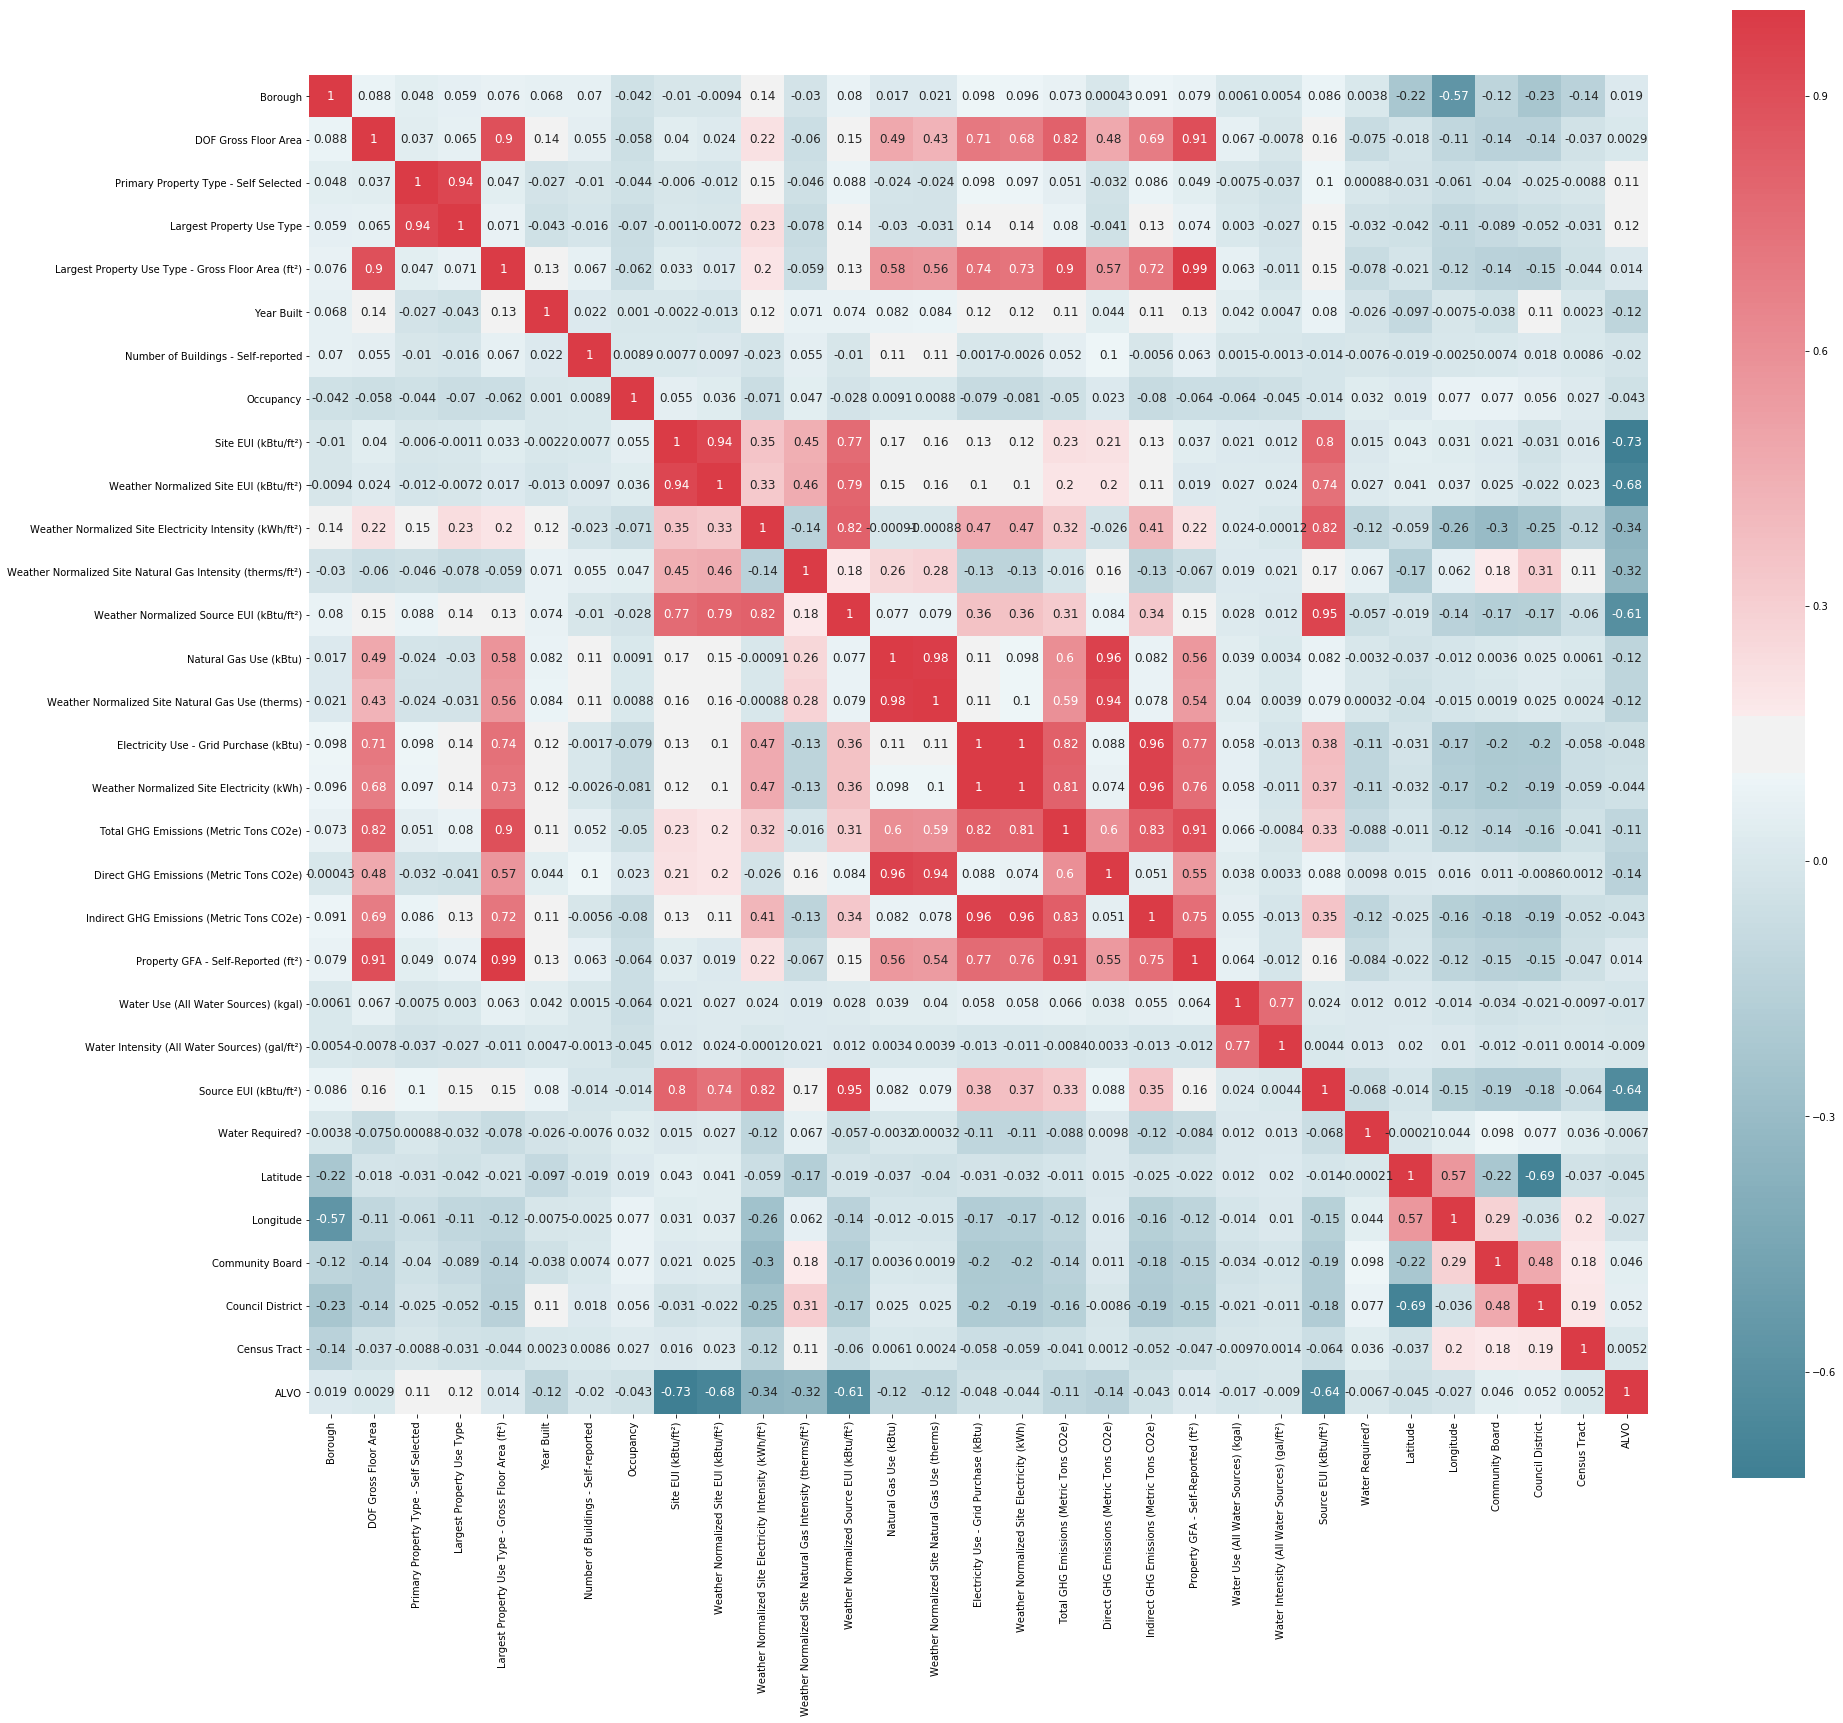

In [176]:
corr = dados_1.corr()
_ , ax = plt.subplots( figsize =( 30 , 30 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })

Optou-se por retirar algumas variáveis que apresentavam alto grau de correlação

In [177]:

colunas=[

'Primary Property Type - Self Selected'
,'Latitude'
,'Longitude'
,'Largest Property Use Type - Gross Floor Area (ft²)'
,'DOF Gross Floor Area'

,'Weather Normalized Site Natural Gas Use (therms)'
,'Total GHG Emissions (Metric Tons CO2e)'
,'Property GFA - Self-Reported (ft²)'
    
,'Weather Normalized Site Electricity Intensity (kWh/ft²)'
]


dados_1.drop(colunas, inplace=True, axis=1)


### Testando os modelos de regressão

In [178]:
from sklearn.model_selection import train_test_split
X=dados_1.iloc[:,:-1]
y=dados_1['ALVO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

1 - Regressão Básica

In [179]:
from sklearn.linear_model import LinearRegression

# Definir o modelo (Regressão Linear)
modelo_1 = LinearRegression()

# Ajustar o modelo (treinamento)
modelo_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [180]:
y_predicted=modelo_1.predict(X_test)

In [181]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predicted)

15.323860223455116

2 - Linear Regression with Ridge regularization (L2 penalty)

In [182]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Melhor alpha :", alpha)

Melhor alpha : 60.0


In [183]:

ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Melhor alpha :", alpha)

Melhor alpha : 84.0


In [184]:
y_predicted=ridge.predict(X_test)
mean_absolute_error(y_test, y_predicted)

15.320472182579259

3 - Linear Regression with Lasso regularization (L1 penalty)

In [185]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Melhor alpha :", alpha)

Melhor alpha : 0.1


In [186]:
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Melhor alpha :", alpha)

Melhor alpha : 0.085


In [187]:
y_predicted=lasso.predict(X_test)
mean_absolute_error(y_test, y_predicted)

15.312795695064331

4 - Adding an xgboost model:

In [188]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=1000, early_stopping_rounds=500)

[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/sr

[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/sr

[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/sr

[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/sr

[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:06] /workspace/sr

[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/sr

[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/sr

[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/sr

[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/sr

[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:07] /workspace/sr

[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/sr

[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/sr

[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/sr

[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/sr

[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:08] /workspace/sr

[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/sr

[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/sr

[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/sr

[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/sr

[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:09] /workspace/sr

[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/sr

[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/sr

[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/sr

[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/sr

[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:10] /workspace/sr

[21:17:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:17:11] /workspace/sr

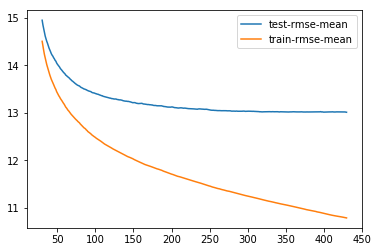

In [189]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [346]:
model_xgb = xgb.XGBRegressor(n_estimators=490, max_depth=3, learning_rate=0.075) 
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.075, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=490,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [347]:
xgb_preds = model_xgb.predict(X_test)
#mean_absolute_error(y_test, xgb_preds)

In [348]:
mean_absolute_error(y_test, xgb_preds)

9.325853462734031

In [193]:
for i in range(0,len(xgb_preds)):
    if xgb_preds[i]>100:
        xgb_preds[i]=100
    if xgb_preds[i]<1:
        xgb_preds[i]=1

In [194]:
mean_absolute_error(y_test, xgb_preds)

9.239147588842414

9.62350886228536

9.325853462734031

O xgboost foi o que apresentou melhor resultado

## Preparação para a submisão

In [195]:
# Carregando arquivo csv usando Pandas
arquivo = 'data/dataset_teste.csv'
dados_sub = pd.read_csv(arquivo)
dados_sub_original = pd.read_csv(arquivo)
print(dados_sub.shape)

(2839, 59)


In [196]:
dados_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 59 columns):
OrderId                                                       2839 non-null int64
Property Id                                                   2839 non-null int64
Property Name                                                 2839 non-null object
Parent Property Id                                            2839 non-null object
Parent Property Name                                          2839 non-null object
BBL - 10 digits                                               2837 non-null object
NYC Borough, Block and Lot (BBL) self-reported                2839 non-null object
NYC Building Identification Number (BIN)                      2839 non-null object
Address 1 (self-reported)                                     2839 non-null object
Address 2                                                     2839 non-null object
Postal Code                                                   283

#### retirada dos campos não utilizados

In [197]:
colunas=['OrderId'
,'Property Id'
,'Property Name'
,'Parent Property Id'
,'Parent Property Name'
,'BBL - 10 digits'
,'NYC Borough, Block and Lot (BBL) self-reported'
,'NYC Building Identification Number (BIN)'
,'Address 1 (self-reported)'
,'Address 2'
,'Street Number'
,'Street Name'
,'Postal Code'
,'List of All Property Use Types at Property'
,'2nd Largest Property Use Type'
,'2nd Largest Property Use - Gross Floor Area (ft²)'
,'3rd Largest Property Use Type'
,'3rd Largest Property Use Type - Gross Floor Area (ft²)'
,'Metered Areas (Energy)'
,'Metered Areas  (Water)'
,'Fuel Oil #1 Use (kBtu)'
,'Fuel Oil #2 Use (kBtu)'
,'Fuel Oil #4 Use (kBtu)'
,'Fuel Oil #5 & 6 Use (kBtu)'
,'Diesel #2 Use (kBtu)'
,'District Steam Use (kBtu)'
,'Release Date'
,'DOF Benchmarking Submission Status'
,'NTA']
dados_sub.drop(colunas, inplace=True, axis=1)

In [198]:
dados_sub['Weather Normalized Site EUI (kBtu/ft²)'] = dados_sub['Weather Normalized Site EUI (kBtu/ft²)'].apply(converter_numero)
dados_sub['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = dados_sub['Weather Normalized Site Electricity Intensity (kWh/ft²)'].apply(converter_numero)
dados_sub['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = dados_sub['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].apply(converter_numero)
dados_sub['Weather Normalized Source EUI (kBtu/ft²)'] = dados_sub['Weather Normalized Source EUI (kBtu/ft²)'].apply(converter_numero)
dados_sub['Natural Gas Use (kBtu)'] = dados_sub['Natural Gas Use (kBtu)'].apply(converter_numero)
dados_sub['Weather Normalized Site Natural Gas Use (therms)'] = dados_sub['Weather Normalized Site Natural Gas Use (therms)'].apply(converter_numero)
dados_sub['Electricity Use - Grid Purchase (kBtu)'] = dados_sub['Electricity Use - Grid Purchase (kBtu)'].apply(converter_numero)
dados_sub['Weather Normalized Site Electricity (kWh)'] = dados_sub['Weather Normalized Site Electricity (kWh)'].apply(converter_numero)
dados_sub['Total GHG Emissions (Metric Tons CO2e)'] = dados_sub['Total GHG Emissions (Metric Tons CO2e)'].apply(converter_numero)
dados_sub['Direct GHG Emissions (Metric Tons CO2e)'] = dados_sub['Direct GHG Emissions (Metric Tons CO2e)'].apply(converter_numero)
dados_sub['Indirect GHG Emissions (Metric Tons CO2e)'] = dados_sub['Indirect GHG Emissions (Metric Tons CO2e)'].apply(converter_numero)
dados_sub['Water Use (All Water Sources) (kgal)'] = dados_sub['Water Use (All Water Sources) (kgal)'].apply(converter_numero)
dados_sub['Water Intensity (All Water Sources) (gal/ft²)'] = dados_sub['Water Intensity (All Water Sources) (gal/ft²)'].apply(converter_numero)

In [199]:
#Borough
dados_sub['Borough']=np.where(dados_sub['Borough'].isnull(), 'Sem Infor', dados_sub['Borough'])
dict_translate_Borough={'Sem Infor':0,'Bronx':1,'Brooklyn':2,'Manhattan':3,'Queens':4,'Staten Island':5}
dados_sub=alteraValores(dados_sub,dict_translate_Borough,'Borough')

#DOF Gross Floor Area
media_DOF_Gross_Floor_Area=round(dados_sub['DOF Gross Floor Area'].mean(),2)
dados_sub['DOF Gross Floor Area'].fillna(media_DOF_Gross_Floor_Area, inplace = True)

#Primary Property Type - Self Selected
dados_sub=alteraValores(dados_sub,dict_tanslate_Primary_Property_Type_Self_Selected,'Primary Property Type - Self Selected')

#'Largest Property Use Type'
dados_sub=alteraValores(dados_sub,dict_Largest_Property_Use_Type,'Largest Property Use Type')

# Weather Normalized Site EUI (kBtu/ft²)
dados_sub['Weather Normalized Site EUI (kBtu/ft²)'].fillna(media_Weather_Normalized_Site_EUI, inplace = True) 

# Weather Normalized Site Electricity Intensity (kWh/ft²)
dados_sub['Weather Normalized Site Electricity Intensity (kWh/ft²)'].fillna(media_Weather_Normalized_Site_Electricity_Intensity, inplace = True) 

# Weather Normalized Site Natural Gas Intensity (therms/ft²)
dados_sub['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].fillna(media_Weather_Normalized_Site_Natural_Gas_Intensity, inplace = True) 

# Weather Normalized Source EUI (kBtu/ft²)
dados_sub['Weather Normalized Source EUI (kBtu/ft²)'].fillna(media_Weather_Normalized_Source_EUI, inplace = True) 

# Natural Gas Use (kBtu)
dados_sub['Natural Gas Use (kBtu)'].fillna(media_Natural_Gas_Use, inplace = True)

# Weather Normalized Site Natural Gas Use (therms)
dados_sub['Weather Normalized Site Natural Gas Use (therms)'].fillna(media_Weather_Normalized_Site_Natural_Gas_Use, inplace = True)

# Electricity Use - Grid Purchase (kBtu)
dados_sub['Electricity Use - Grid Purchase (kBtu)'].fillna(media_Electricity_Use_Grid_Purchase, inplace = True)

# Weather Normalized Site Electricity (kWh)
dados_sub['Weather Normalized Site Electricity (kWh)'].fillna(media_Weather_Normalized_Site_Electricity, inplace = True)

# Total GHG Emissions (Metric Tons CO2e)
dados_sub['Total GHG Emissions (Metric Tons CO2e)'].fillna(media_Total_GHG_Emissions, inplace = True)

# Direct GHG Emissions (Metric Tons CO2e)
dados_sub['Direct GHG Emissions (Metric Tons CO2e)'].fillna(media_Direct_GHG_Emissions, inplace = True)

# Indirect GHG Emissions (Metric Tons CO2e)
dados_sub['Indirect GHG Emissions (Metric Tons CO2e)'].fillna(media_Indirect_GHG_Emissions, inplace = True)

# Water Use (All Water Sources) (kgal)
dados_sub['Water Use (All Water Sources) (kgal)'].fillna(media_Water_Use, inplace = True)

# Water Intensity (All Water Sources) (gal/ft²)
dados_sub['Water Intensity (All Water Sources) (gal/ft²)'].fillna(media_Water_Intensity, inplace = True)

# Source EUI (kBtu/ft²)
dados_sub['Source EUI (kBtu/ft²)'].fillna(media_Source_EUI, inplace = True)

# Water Required?
dados_sub['Water Required?']=np.where(dados_sub['Water Required?'].isnull(), 'Sem Infor', dados_sub['Water Required?'])
dados_sub=alteraValores(dados_sub,dict_Water_Required,'Water Required?')

# Latitude
dados_sub['Latitude'].fillna(media_Latitude, inplace = True)

# Longitude
dados_sub['Longitude'].fillna(media_Longitude, inplace = True)

# Community Board
dados_sub['Community Board'].fillna(media_Community_Board, inplace = True)

# Council District
dados_sub['Council District'].fillna(media_Council_District, inplace = True)

# Census Tract
dados_sub['Census Tract'].fillna(media_Census_Tract, inplace = True)

In [200]:
dados_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 30 columns):
Borough                                                       2839 non-null int64
DOF Gross Floor Area                                          2839 non-null float64
Primary Property Type - Self Selected                         2839 non-null int64
Largest Property Use Type                                     2839 non-null int64
Largest Property Use Type - Gross Floor Area (ft²)            2839 non-null float64
Year Built                                                    2839 non-null int64
Number of Buildings - Self-reported                           2839 non-null int64
Occupancy                                                     2839 non-null int64
Site EUI (kBtu/ft²)                                           2839 non-null float64
Weather Normalized Site EUI (kBtu/ft²)                        2839 non-null float64
Weather Normalized Site Electricity Intensity (kWh/ft²)       283

In [201]:
dados_sub.isnull().any()

Borough                                                       False
DOF Gross Floor Area                                          False
Primary Property Type - Self Selected                         False
Largest Property Use Type                                     False
Largest Property Use Type - Gross Floor Area (ft²)            False
Year Built                                                    False
Number of Buildings - Self-reported                           False
Occupancy                                                     False
Site EUI (kBtu/ft²)                                           False
Weather Normalized Site EUI (kBtu/ft²)                        False
Weather Normalized Site Electricity Intensity (kWh/ft²)       False
Weather Normalized Site Natural Gas Intensity (therms/ft²)    False
Weather Normalized Source EUI (kBtu/ft²)                      False
Natural Gas Use (kBtu)                                        False
Weather Normalized Site Natural Gas Use (therms)

In [202]:
colunas=[
'Primary Property Type - Self Selected'
,'Latitude'
,'Longitude'
,'Largest Property Use Type - Gross Floor Area (ft²)'
,'DOF Gross Floor Area'
,'Weather Normalized Site Natural Gas Use (therms)'
,'Total GHG Emissions (Metric Tons CO2e)'
,'Property GFA - Self-Reported (ft²)'
,'Weather Normalized Site Electricity Intensity (kWh/ft²)'
]

dados_sub.drop(colunas, inplace=True, axis=1)

In [203]:
y_sub=model_xgb.predict(dados_sub)

In [204]:
for i in range(0,len(y_sub)):
    if y_sub[i]>100:
        y_sub[i]=100
    if y_sub[i]<1:
        y_sub[i]=1

In [205]:
y_sub[25]

1.0

### Preparando o arquivo para submissão

In [206]:
dfResult=pd.DataFrame(y_sub, columns=['score'], index=dados_sub_original.index)

frames=[dados_sub_original.iloc[:,1:2], dfResult]
df_final = pd.concat(frames, axis=1, join_axes=[dados_sub_original.index])

df_final

,Property Id,score
0,2637863,98.05
1,4988569,82.84
2,3129181,73.35
3,3129231,29.49
4,2658438,100.00
5,2646962,95.38
6,2746882,88.88
7,2658502,100.00
8,3114587,100.00
9,2809829,100.00


In [207]:
df_final['score']=df_final['score'].round().values.astype(np.int64)

In [208]:
df_final['score']=df_final['score'].abs()  ## Só fiz isso para submeter ....

In [210]:
df_final.to_csv('arquivoFinal12.csv', index=False, sep=',', encoding='utf-8')